# Licence Plate Recognition with YOLOv11 + PaddleOCR

–ó–∞–¥–∞—á–∞ –¥–∞–Ω–Ω–æ–≥–æ –ø—Ä–æ–µ–∫—Ç–∞ —Å–æ—Å—Ç–æ–∏—Ç –≤ —Ç–æ–º, —á—Ç–æ–±—ã –Ω–∞–∏–ª—É—á—à–∏–º –æ–±—Ä–∞–∑–æ–º —Ä–∞—Å–ø–æ–∑–Ω–∞—Ç—å –∞–≤—Ç–æ–º–æ–±–∏–ª—å–Ω—ã–µ –Ω–æ–º–µ—Ä–∞. 
–î–ª—è —Ä–µ—à–µ–Ω–∏—è –¥–∞–Ω–Ω–æ–π –∑–∞–¥–∞—á–∏ –ø–æ–¥–µ–ª–∏–º –µ—ë –Ω–∞ –¥–≤–µ —á–∞—Å—Ç–∏: –¥–µ—Ç–µ–∫—Ü–∏—è (YOLOv11) –∏ —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏–µ (PaddleOCR). 

# –ß–∞—Å—Ç—å –ø–µ—Ä–≤–∞—è. –î–µ—Ç–µ–∫—Ü–∏—è –∞–≤—Ç–æ–º–æ–±–∏–ª—å–Ω—ã—Ö –Ω–æ–º–µ—Ä–æ–≤

In [2]:
import os
import cv2
import torch
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from torchvision.io import read_image
import matplotlib.patches as patches
from pathlib import Path
from glob import glob
import shutil
import yaml

from ultralytics import YOLO

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

Creating new Ultralytics Settings v0.0.6 file ‚úÖ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
cuda


–£ –Ω–∞—Å –µ—Å—Ç—å ~4–∫ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö —Ä–∞–∑–º–µ—á–µ–Ω–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π, ~1.3–∫ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö –±–µ–∑ —Ä–∞–∑–º–µ—Ç–∫–∏, –∏ ~3.5–∫ –Ω–µ—Ä–∞–∑–º–µ—á–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö, –∫–æ—Ç–æ—Ä—ã–µ –º—ã –∏—Å–ø–æ–ª—å–∑—É–µ–º –¥–ª—è —Ç—Ä–µ–Ω–∏—Ä–æ–≤–∫–∏ (–∏–ª–∏ –≤–∞–ª–∏–¥–∞—Ü–∏–∏). 

–¢–∞–∫–∂–µ —É –Ω–∞—Å –∏–º–µ–µ—Ç—Å—è —Ç–µ–∫—Å—Ç–æ–≤—ã–π —Ñ–∞–π–ª —Å –∞–Ω–Ω–æ—Ç–∞—Ü–∏—è–º–∏, –≤ –∫–æ—Ç–æ—Ä–æ–º –∑–∞–ø–∏—Å–∞–Ω–æ –∏–º—è —Ñ–∞–π–ª–∞ —Å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ–º, gt –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã bounding boxes –∏ gt –∞–≤—Ç–æ–º–æ–±–∏–ª—å–Ω—ã–π –Ω–æ–º–µ—Ä. 
–î–ª—è –ø–µ—Ä–≤–æ–π —á–∞—Å—Ç–∏ —Å—Ç–æ—è—â–µ–π –ø–µ—Ä–µ–¥ –Ω–∞–º–∏ –∑–∞–¥–∞—á–∏, –Ω–∞–º –ø–æ–Ω–∞–¥–æ–±–∏—Ç—Å—è –≤—Å—ë, –∫—Ä–æ–º–µ –Ω–æ–º–µ—Ä–∞.

–ò–∑—É—á–∏–º –¥–∞–Ω–Ω—ã–µ –∏ –ø–æ–¥–≥–æ—Ç–æ–≤–∏–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º.

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –ø—Ä–∏–º–µ—Ä –Ω–∏–∂–µ. –ù–∞ –¥–∞–Ω–Ω–æ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–∏ –º—ã –º–æ–∂–µ–º –∑–∞–º–µ—Ç–∏—Ç—å –¥–≤–∞ –∞–≤—Ç–æ–º–æ–±–∏–ª—å–Ω—ã—Ö –Ω–æ–º–µ—Ä–∞: –∏ —ç—Ç–æ –Ω–µ —Ä–µ–¥–∫–∏–π —Å–ª—É—á–∞–π –≤ –¥–∞–Ω–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ, —Ç.–∫. –æ–Ω–∏ –≤ –æ—Å–Ω–æ–≤–Ω–æ–º –∫–∏—Ç–∞–π—Å–∫–∏–µ.

In [4]:
data_path = '/kaggle/input/car-plate/data_jpg'

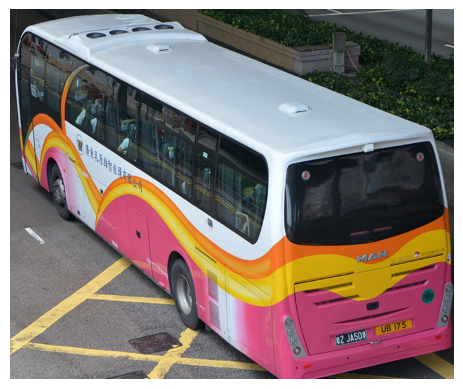

In [9]:
img_path = os.path.join(data_path, 'images/train/000000_0.jpg')
img = read_image(img_path)

plt.axis('off')
plt.imshow(img.permute(1, 2, 0))
plt.show()

–¢–µ–ø–µ—Ä—å —Å–æ–∑–¥–∞–¥–∏–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º –∏–∑ –Ω–∞—à–µ–≥–æ —Ç–µ–∫—Å—Ç–æ–≤–æ–≥–æ —Ñ–∞–π–ª–∞ —Å –∞–Ω–Ω–æ—Ç–∞—Ü–∏—è–º–∏. 

–ö–∞–∫ –≤–∏–¥–∏–º –Ω–∞ —Å–∞–º–æ–π –ø–µ—Ä–≤–æ–π —Å—Ç—Ä–æ—á–∫–µ (–∏–ª–∏ –≤–∂–∏–≤—É—é –Ω–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–∏ –≤—ã—à–µ —á–µ—Ä–Ω—ã–π –∞–≤—Ç–æ–º–æ–±–∏–ª—å–Ω—ã–π –Ω–æ–º–µ—Ä), –ø–µ—Ä–∏–æ–¥–∏—á–µ—Å–∫–∏ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –Ω–æ–º–µ—Ä–∞ —Å –∫–∏—Ç–∞–π—Å–∫–∏–º–∏ –∏–µ—Ä–æ–≥–ª–∏—Ñ–∞–º–∏. –≠—Ç–æ –Ω–µ–º–Ω–æ–≥–æ —É—Å–ª–æ–∂–Ω—è–µ—Ç –∑–∞–¥–∞—á—É –∏ –¥–æ–±–∞–≤–ª—è–µ—Ç –≤ –Ω–µ—ë –Ω–µ–∫–æ—Ç–æ—Ä–æ–≥–æ —ç–∫—Å—Ç—Ä–∏–º–∞, —Ö–æ—Ç—å –∏ —ç—Ç–æ –¥–µ–ª–∞–µ—Ç –µ—ë –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ–π, –Ω–æ —ç—Ç–æ —è –∑–∞–±–µ–≥–∞—é –≤–ø–µ—Ä—ë–¥ :)

In [5]:
cols=['image_name', 'x_1', 'y_1', 'x_2', 'y_2', 'plate']
annot_path = os.path.join(data_path, 'annotation/train_final_annot.txt')
df = pd.read_csv(annot_path, sep=",", names=cols, skiprows=1, header=None)
df.head()

image_name   x_1  y_1   x_2  y_2    plate
0  train/000000_0.jpg   566  558   626  586  Á≤§ZJA50Ê∏Ø
1  train/000000_0.jpg   635  538   705  570    UB175
2  train/000001_0.jpg  1003  791  1160  831   MB3185
3  train/000002_0.jpg  1077  565  1209  604   NG8134
4  train/000004_0.jpg   972  627  1120  668    TT583

–î–∞—Ç–∞—Ñ—Ä–µ–π–º –≤—ã—à–µ —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π, –∫–æ—Ç–æ—Ä—ã–µ —Ä–∞–∑–º–µ—á–µ–Ω—ã. –ù–æ —É –Ω–∞—Å —Ç–∞–∫–∂–µ –µ—Å—Ç—å –Ω–µ—Ä–∞–∑–º–µ—á–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ, –∫–æ—Ç–æ—Ä—ã–µ –º—ã —Ö–æ—Ç–∏–º —Ç–æ–∂–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–ª—è train/val. –†–∞–∑–º–µ—á–∞—Ç—å —Å–∞–º–æ–º—É –ø—Ä–∏–º–µ—Ä–Ω–æ 3.5–∫ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π, –µ—â—ë –∏ –±–µ—Å–ø–ª–∞—Ç–Ω–æ, –∫–∞–∫-—Ç–æ –Ω–µ –æ—á–µ–Ω—å —Ö–æ—Ç–µ–ª–æ—Å—å. –ö–∞–∫ –∂–µ —Ä–µ—à–∏—Ç—å —ç—Ç—É –ø—Ä–æ–±–ª–µ–º—É? 

–ê —Ä–µ—à–µ–Ω–∏–µ –µ—Å—Ç—å! –ï—Å—Ç—å –∑–∞–º–µ—á–∞—Ç–µ–ª—å–Ω–∞—è (—Ö–æ—Ç—å —Ç–∞–∫ –∏ –ø—Ä–æ—Å—è—â–∞—è —Ç–∞–Ω—Ü—ã —Å –±—É–±–Ω–æ–º –ø—Ä–∏ —É—Å—Ç–∞–Ω–æ–≤–∫–µ –∏–∑-–∑–∞ –ø–æ–ª–æ–º–æ–∫ –∫–∞–∫–∏—Ö-–Ω–∏–±—É–¥—å –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–µ–π –±–∏–±–ª–∏–æ—Ç–µ–∫) –º–æ–¥–µ–ª—å GroundingDino! –° –ø–æ–º–æ—â—å—é —Ç–µ–∫—Å—Ç–æ–≤–æ–≥–æ –ø—Ä–æ–º–ø—Ç–∞ —É–¥–∞–ª–æ—Å—å —Å–æ–∑–¥–∞—Ç—å –ø—Å–µ–≤–¥–æ—Ä–∞–∑–º–µ—Ç–∫–∏ –¥–æ–≤–æ–ª—å–Ω–æ –±—ã—Å—Ç—Ä–æ, —á—Ç–æ –Ω–µ –º–æ–∂–µ—Ç –Ω–µ —Ä–∞–¥–æ–≤–∞—Ç—å. –¢–µ–º –±–æ–ª–µ–µ, —á—Ç–æ —Å –Ω–∏–º–∏ –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏ –≤–æ–∑—Ä–∞—Å—Ç–∞–µ—Ç. –ù–æ —ç—Ç–æ —è —Ç–æ–∂–µ –∑–∞–±–µ–≥–∞—é –≤–ø–µ—Ä—ë–¥:)

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –¥–∞–Ω–Ω–æ–π —Ä–∞–∑–º–µ—Ç–∫–∏ –∑–∞–ø–∏—Å–∞–Ω—ã –≤ csv, —Ç–∞–∫ –¥–∞–≤–∞–π—Ç–µ –∏—Ö –∏—Å–ø–æ–ª—å–∑—É–µ–º. 

In [6]:
df_na = pd.read_csv('/kaggle/input/csv-file/not_annotated.csv')
df_na.head()

image_name          x_1         y_1         x_2        y_2
0  not_annotated/002541_0.jpg   755.440550   91.290855   785.85010  119.11942
1  not_annotated/002541_0.jpg   694.310850  266.618350   842.25240  316.14240
2  not_annotated/000376_0.jpg    53.724410  610.790160   284.54248  767.30615
3      not_annotated/3361.jpg  1184.829800  565.816830  1320.41850  657.44977
4      not_annotated/1656.jpg    40.070023   68.110710    75.32835   83.46694

–î–∞–≤–∞–π—Ç–µ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º bounding boxes –∏ —É–±–µ–¥–∏–º—Å—è, —á—Ç–æ –≤—Å—ë —Ö–æ—Ä–æ—à–æ —Ä–∞–∑–º–µ—Ç–∏–ª–æ—Å—å. –ù–∞–ø–∏—à–µ–º –¥–ª—è —ç—Ç–æ–≥–æ —Ñ—É–Ω–∫—Ü–∏—é:

In [29]:
def visualize_bounding_box(image, xmin, ymin, xmax, ymax):
    if isinstance(image, torch.Tensor):
        image_np = image.permute(1, 2, 0).numpy() 
    image_np = image[:, :, ::-1]
    fig, ax = plt.subplots(1)
    ax.imshow(image_np)
    
    width = xmax - xmin
    height = ymax - ymin
    rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    
    
    # –î–æ–±–∞–≤–ª—è–µ–º —Ç–æ—á–∫–∏ –Ω–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
    ax.scatter(xmin, ymin, color='white', s=10, marker='o')
    ax.scatter(xmax, ymax, color='white', s=10, marker='o')
    ax.text(xmin, ymin, f'[{xmin}, {ymin}]', fontsize=10, color='white', ha='right', va='bottom')
    ax.text(xmax, ymax, f'[{xmax}, {ymax}]', fontsize=10, color='white', ha='left', va='top')
    
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    
    plt.show();

In [20]:
data_path = data_path + '/images'

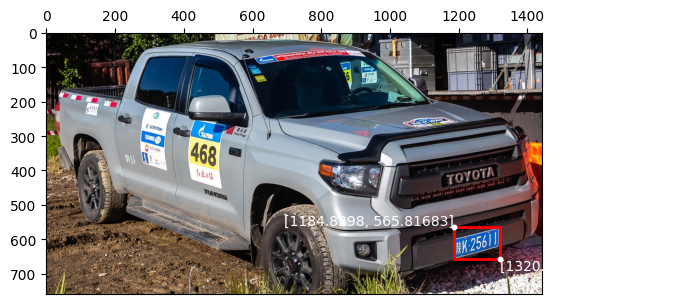

In [38]:
img_na = cv2.imread(os.path.join(data_path, df_na.iloc[3]['image_name']))
x1, y1, x2, y2 = df_na[['x_1', 'y_1','x_2', 'y_2']].iloc[3].to_numpy()
visualize_bounding_box(img_na, x1, y1, x2, y2)

–í—Å—ë —Å—É–ø–µ—Ä!

–¢–µ–ø–µ—Ä—å –æ–±—ä–µ–¥–∏–Ω–∏–º –¥–≤–∞ —ç—Ç–∏—Ö –¥–∞—Ç–∞—Å–µ—Ç–∞ –≤ –æ–¥–∏–Ω –¥–∞—Ç–∞—Ñ—Ä–µ–π–º. –ü–æ–∫–∞ –≤—ã–∫–∏–Ω–µ–º –Ω–æ–º–µ—Ä–∞.

In [32]:
df_new = pd.concat([df.drop('plate', axis=1), df_na], ignore_index=True)
df_new.tail()

image_name         x_1         y_1        x_2        y_2
7558  not_annotated/004213_0.jpg    0.044220    3.570465  364.04102  545.48010
7559      not_annotated/3919.jpg  189.251160  453.578640  292.30823  492.07840
7560      not_annotated/2193.jpg  152.288540  193.285600  236.46304  228.20757
7561      not_annotated/3863.jpg   81.452540  128.422260  153.77362  161.10829
7562  not_annotated/004322_3.jpg    0.808548  113.338060  425.27148  452.82587

–î–ª—è —É–¥–æ–±—Å—Ç–≤–∞ –¥–æ–±–∞–≤–∏–º image_path.

In [33]:
df_new['image_path'] = '/kaggle/input/car-plate/data_jpg/images/' + df_new['image_name'] 

In [34]:
df_new

image_name          x_1         y_1         x_2  \
0             train/000000_0.jpg   566.000000  558.000000   626.00000   
1             train/000000_0.jpg   635.000000  538.000000   705.00000   
2             train/000001_0.jpg  1003.000000  791.000000  1160.00000   
3             train/000002_0.jpg  1077.000000  565.000000  1209.00000   
4             train/000004_0.jpg   972.000000  627.000000  1120.00000   
...                          ...          ...         ...         ...   
7558  not_annotated/004213_0.jpg     0.044220    3.570465   364.04102   
7559      not_annotated/3919.jpg   189.251160  453.578640   292.30823   
7560      not_annotated/2193.jpg   152.288540  193.285600   236.46304   
7561      not_annotated/3863.jpg    81.452540  128.422260   153.77362   
7562  not_annotated/004322_3.jpg     0.808548  113.338060   425.27148   

            y_2                                         image_path  
0     586.00000  /kaggle/input/car-plate/data_jpg/images/train/...  
1     570.00000  /kaggle/input/car-plate/data_jpg/images/train/...  
2     831.00000  /kaggle/input/car-plate/data_jpg/images/train/...  
3     604.00000  /kaggle/input/car-plate/data_jpg/images/train/...  
4     668.00000  /kaggle/input/car-plate/data_jpg/images/train/...  
...         ...                                                ...  
7558  545.48010  /kaggle/input/car-plate/data_jpg/images/not_an...  
7559  492.07840  /kaggle/input/car-plate/data_jpg/images/not_an...  
7560  228.20757  /kaggle/input/car-plate/data_jpg/images/not_an...  
7561  161.10829  /kaggle/input/car-plate/data_jpg/images/not_an...  
7562  452.82587  /kaggle/input/car-plate/data_jpg/images/not_an...  

[7563 rows x 6 columns]

–ù–æ –¥–ª—è YOLO –¥–∞–Ω–Ω—ã–π —Ñ–æ—Ä–º–∞—Ç —Ä–∞–∑–º–µ—Ç–∫–∏ –Ω–µ –ø–æ–¥—Ö–æ–¥–∏—Ç. 

–°–¥–µ–ª–∞–µ–º –∏–∑ Pascal VOC (x1, y1, x2, y2) -> YOLO (x_center_norm, y_center_norm, width_norm, height_norm)

In [39]:
def pascal_voc_to_yolo_boxes(image, xmin, ymin, xmax, ymax):
    _, height, width = image.shape
    h = [ymax+ymin, ymax-ymin]
    w = [xmax+xmin, xmax-xmin]
    x_center = w[0]/2
    y_center = h[0]/2
    
    x_center_norm = x_center/width
    y_center_norm =  y_center/height
    width_norm = w[1]/width
    height_norm = h[1]/height
    yolo_bbox = [x_center_norm, y_center_norm, width_norm, height_norm]
    
    return yolo_bbox

In [40]:
def process_row(row):
    img = read_image(row['image_path'])
    return pascal_voc_to_yolo_boxes(img, row.x_1, row.y_1, row.x_2, row.y_2)

results = df_new.apply(process_row, axis=1)
df_new[['x_c', 'y_c', 'w', 'h']] = pd.DataFrame(results.tolist(), index=df_new.index)

In [41]:
df_new

image_name          x_1         y_1         x_2  \
0             train/000000_0.jpg   566.000000  558.000000   626.00000   
1             train/000000_0.jpg   635.000000  538.000000   705.00000   
2             train/000001_0.jpg  1003.000000  791.000000  1160.00000   
3             train/000002_0.jpg  1077.000000  565.000000  1209.00000   
4             train/000004_0.jpg   972.000000  627.000000  1120.00000   
...                          ...          ...         ...         ...   
7558  not_annotated/004213_0.jpg     0.044220    3.570465   364.04102   
7559      not_annotated/3919.jpg   189.251160  453.578640   292.30823   
7560      not_annotated/2193.jpg   152.288540  193.285600   236.46304   
7561      not_annotated/3863.jpg    81.452540  128.422260   153.77362   
7562  not_annotated/004322_3.jpg     0.808548  113.338060   425.27148   

            y_2                                         image_path       x_c  \
0     586.00000  /kaggle/input/car-plate/data_jpg/images/train/...  0.768041   
1     570.00000  /kaggle/input/car-plate/data_jpg/images/train/...  0.863402   
2     831.00000  /kaggle/input/car-plate/data_jpg/images/train/...  0.767021   
3     604.00000  /kaggle/input/car-plate/data_jpg/images/train/...  0.795407   
4     668.00000  /kaggle/input/car-plate/data_jpg/images/train/...  0.772526   
...         ...                                                ...       ...   
7558  545.48010  /kaggle/input/car-plate/data_jpg/images/not_an...  0.500117   
7559  492.07840  /kaggle/input/car-plate/data_jpg/images/not_an...  0.252920   
7560  228.20757  /kaggle/input/car-plate/data_jpg/images/not_an...  0.637298   
7561  161.10829  /kaggle/input/car-plate/data_jpg/images/not_an...  0.532186   
7562  452.82587  /kaggle/input/car-plate/data_jpg/images/not_an...  0.416094   

           y_c         w         h  
0     0.885449  0.077320  0.043344  
1     0.857585  0.090206  0.049536  
2     0.871106  0.111348  0.042965  
3     0.829078  0.091858  0.055319  
4     0.806351  0.109306  0.051059  
...        ...       ...       ...  
7558  0.490224  0.999991  0.967696  
7559  0.959084  0.108253  0.078093  
7560  0.780543  0.275982  0.129341  
7561  0.462509  0.327245  0.104428  
7562  0.622158  0.829029  0.746127  

[7563 rows x 10 columns]

–û—Ç–ª–∏—á–Ω–æ, –º—ã –ø–æ—á—Ç–∏ –≥–æ—Ç–æ–≤—ã! –†–∞–∑–¥–µ–ª–∏–º –Ω–∞—à–∏ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –Ω–∞ train/val.

In [42]:
# –ü–æ–∑–∞–±–æ—Ç–∏–º—Å—è –æ –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç–∏ 
def enable_determinism():
    os.environ['CUBLAS_WORKSPACE_CONFIG'] = ':4096:8'
    torch.use_deterministic_algorithms(True)

def fix_seeds(seed):
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.mps.manual_seed(seed)


enable_determinism()
fix_seeds(24)

–†–∞–∑–¥–µ–ª–∏–º –∏–º–µ–Ω–Ω–æ –ø–æ –Ω–∞–∑–≤–∞–Ω–∏—è–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π, —Ç.–∫. –∏–∑-–∑–∞ —Ç–æ–≥–æ, —á—Ç–æ –Ω–∞ –∫–∞—Ä—Ç–∏–Ω–∫–µ –º–æ–∂–µ—Ç –±—ã—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ bboxes, –Ω–∞–∑–≤–∞–Ω–∏–µ —Ñ–∞–π–ª–∞ –º–æ–∂–µ—Ç –¥—É–±–ª–∏—Ä–æ–≤–∞—Ç—å—Å—è. –ò –µ—Å–ª–∏ –º—ã –ø—Ä–æ—Å—Ç–æ —Å–ª—É—á–∞–π–Ω–æ —Ä–∞–∑–¥–µ–ª–∏–º —Ç–∞–±–ª–∏—Ü—É, —Ç–æ –µ—Å—Ç—å —à–∞–Ω—Å —Ç–æ–≥–æ, —á—Ç–æ –∫–∞—Ä—Ç–∏–Ω–∫–∞ –ø–æ–ø–∞–¥–µ—Ç –∏ –≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—É—é, –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—É—é –≤—ã–±–æ—Ä–∫—É. –ù–∞–º —Ç–∞–∫–æ–≥–æ –Ω–µ –Ω–∞–¥–æ.

In [43]:
unique_images = df_new['image_name'].unique() 
np.random.shuffle(unique_images)
 
# 10% –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏—é
val_size = int(0.1 * len(unique_images))
val_images = set(unique_images[:val_size])
train_images = set(unique_images[val_size:])
 
df_train = df_new[df_new['image_name'].isin(train_images)]
df_val = df_new[df_new['image_name'].isin(val_images)]
 
print(f"Train images: {len(train_images)}")
print(f"Val images:   {len(val_images)}")

Train images: 6300
Val images:   699


In [44]:
df_train

image_name          x_1         y_1          x_2  \
0             train/000000_0.jpg   566.000000  558.000000   626.000000   
1             train/000000_0.jpg   635.000000  538.000000   705.000000   
2             train/000001_0.jpg  1003.000000  791.000000  1160.000000   
3             train/000002_0.jpg  1077.000000  565.000000  1209.000000   
5             train/000005_0.jpg   159.000000  685.000000   280.000000   
...                          ...          ...         ...          ...   
7557  not_annotated/001501_2.jpg     0.011530  168.413160    56.702896   
7558  not_annotated/004213_0.jpg     0.044220    3.570465   364.041020   
7560      not_annotated/2193.jpg   152.288540  193.285600   236.463040   
7561      not_annotated/3863.jpg    81.452540  128.422260   153.773620   
7562  not_annotated/004322_3.jpg     0.808548  113.338060   425.271480   

            y_2                                         image_path       x_c  \
0     586.00000  /kaggle/input/car-plate/data_jpg/images/train/...  0.768041   
1     570.00000  /kaggle/input/car-plate/data_jpg/images/train/...  0.863402   
2     831.00000  /kaggle/input/car-plate/data_jpg/images/train/...  0.767021   
3     604.00000  /kaggle/input/car-plate/data_jpg/images/train/...  0.795407   
5     728.00000  /kaggle/input/car-plate/data_jpg/images/train/...  0.178310   
...         ...                                                ...       ...   
7557  188.50114  /kaggle/input/car-plate/data_jpg/images/not_an...  0.128313   
7558  545.48010  /kaggle/input/car-plate/data_jpg/images/not_an...  0.500117   
7560  228.20757  /kaggle/input/car-plate/data_jpg/images/not_an...  0.637298   
7561  161.10829  /kaggle/input/car-plate/data_jpg/images/not_an...  0.532186   
7562  452.82587  /kaggle/input/car-plate/data_jpg/images/not_an...  0.416094   

           y_c         w         h  
0     0.885449  0.077320  0.043344  
1     0.857585  0.090206  0.049536  
2     0.871106  0.111348  0.042965  
3     0.829078  0.091858  0.055319  
5     0.924738  0.098294  0.056283  
...        ...       ...       ...  
7557  0.749820  0.256522  0.084403  
7558  0.490224  0.999991  0.967696  
7560  0.780543  0.275982  0.129341  
7561  0.462509  0.327245  0.104428  
7562  0.622158  0.829029  0.746127  

[6802 rows x 10 columns]

–î–∞–≤–∞–π—Ç–µ –µ—â—ë –Ω–∞–ø–∏—à–µ–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –∏–º–µ–Ω–Ω–æ yolo box.

YOLO —Ñ–æ—Ä–º–∞—Ç
(x_center_normalize, y_center_normalize, width_normalize, height_normalize)
bbox:
 [0.7680412371134021 0.8854489164086687 0.07731958762886598 0.043343653250773995]


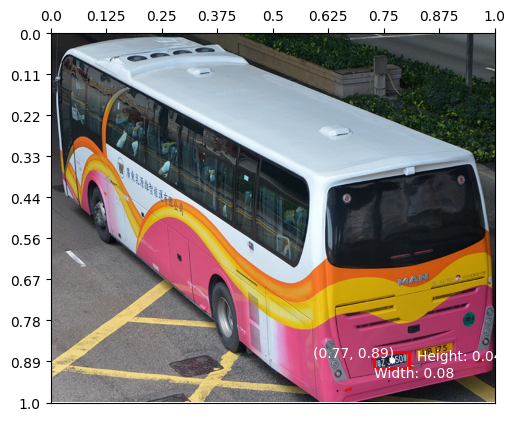

In [47]:
def visualize_yolo_bbox(image_tensor, bbox):
    print('YOLO —Ñ–æ—Ä–º–∞—Ç\n(x_center_normalize, y_center_normalize, width_normalize, height_normalize)')
    print('bbox:\n', bbox)
    image_np = image_tensor.permute(1, 2, 0).numpy()  # (H, W, C)
    fig, ax = plt.subplots(1)
    ax.imshow(image_np)

    h, w, _ = image_np.shape
    x_center, y_center, width, height = bbox

    # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω–Ω—ã–µ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã –≤ –ø–∏–∫—Å–µ–ª–∏
    x_center_pix = x_center * w
    y_center_pix = y_center * h
    width_pix = width * w
    height_pix = height * h

    xmin = int(x_center_pix - width_pix / 2)
    ymin = int(y_center_pix - height_pix / 2)
    xmax = int(x_center_pix + width_pix / 2)
    ymax = int(y_center_pix + height_pix / 2)

    rect = patches.Rectangle((xmin, ymin), width_pix, height_pix, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)


    # –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º —Ü–µ–Ω—Ç—Ä
    ax.scatter(x_center_pix, y_center_pix, color='white', s=10, marker='o')
    plt.text(x_center_pix + 5, y_center_pix, f'({round(x_center,2)}, {round(y_center,2)})', fontsize=10, color='white', ha='right', va='bottom')

    plt.text(x_center_pix - 30, ymax + 15, f"Width: {width:.2f}", color='white', fontsize=10)
    plt.text(xmax + 15, y_center_pix, f"Height: {height:.2f}", color='white', fontsize=10)

    # –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω—ã–µ –æ—Å–∏ –æ—Ç 0 –¥–æ 1
    ax.set_xticks(np.linspace(0, w, num=9))  # 6 –º–µ—Ç–æ–∫ –ø–æ –æ—Å–∏ X
    ax.set_yticks(np.linspace(0, h, num=10))  # 6 –º–µ—Ç–æ–∫ –ø–æ –æ—Å–∏ Y

    ax.set_xticklabels(np.linspace(0, 1, num=9), rotation=0)
    ax.set_yticklabels(np.round(np.linspace(0, 1, num=10), 2))  # –ü–µ—Ä–µ–≤–æ—Ä–æ—Ç –¥–ª—è –ø—Ä–∞–≤–∏–ª—å–Ω–æ–≥–æ –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è Y
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    plt.show()

yolo_box = df_train.iloc[0]['x_c':'h'].to_numpy()
visualize_yolo_bbox(img, yolo_box)

### –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ train –∏ val

–¢–µ–ø–µ—Ä—å –Ω–∞–º –Ω—É–∂–Ω–æ –ø–µ—Ä–µ–≤–µ—Å—Ç–∏ –¥–∞–Ω–Ω—ã–µ –≤ —Ñ–æ—Ä–º–∞—Ç, –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–π –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏.
–î–ª—è —ç—Ç–æ–≥–æ –Ω—É–∂–Ω–æ –ø–æ–¥–≥–æ—Ç–æ–≤–∏—Ç—å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –∏ —Ä–∞–∑–º–µ—Ç–∫—É bbox-–æ–≤ –≤ –æ–ø—Ä–µ–¥–µ–ª—ë–Ω–Ω–æ–º —Ñ–æ—Ä–º–∞—Ç–µ –∏ —É–∫–∞–∑–∞—Ç—å –ø—É—Ç–∏ –∫ –Ω–∏–º –≤ YAML-–∫–æ–Ω—Ñ–∏–≥–µ.

```
dataset_path
‚îú‚îÄ‚îÄ images
‚îÇ   ‚îú‚îÄ‚îÄ train
‚îÇ   ‚îÇ¬†¬† ‚îú‚îÄ‚îÄ image_1.jpg
‚îÇ   ‚îÇ¬†¬† ‚îú‚îÄ‚îÄ image_2.jpg
‚îÇ¬†¬† ‚îî‚îÄ‚îÄ val
‚îÇ¬†¬†     ‚îú‚îÄ‚îÄ image_3.jpg
‚îÇ¬†¬†     ‚îî‚îÄ‚îÄ image_4.jpg
‚îî‚îÄ‚îÄ labels
    ‚îú‚îÄ‚îÄ train
    ‚îÇ¬†¬† ‚îú‚îÄ‚îÄ image_1.txt
    ‚îÇ¬†¬† ‚îî‚îÄ‚îÄ image_2.txt
    ‚îî‚îÄ‚îÄ val
        ‚îú‚îÄ‚îÄ image_3.txt
        ‚îî‚îÄ‚îÄ image_4.txt
```
–§–∞–π–ª—ã —Å —Ä–∞–∑–º–µ—Ç–∫–æ–π –∏–º–µ—é—Ç —Å–ª–µ–¥—É—é—â–∏–π —Ñ–æ—Ä–º–∞—Ç:
```
0 0.568359375 0.578125 0.33984375 0.64583331
```
–í–Ω–∞—á–∞–ª–µ –∏–¥—ë—Ç –∏–Ω–¥–µ–∫—Å –∫–ª–∞—Å—Å–∞, –≤ –Ω–∞—à–µ–π –∑–∞–¥–∞—á–µ —Ç–æ–ª—å–∫–æ –æ–¥–∏–Ω –∫–ª–∞—Å—Å 'plate' —Å –∏–Ω–¥–µ–∫—Å–æ–º 0. –ó–∞—Ç–µ–º –∏–¥—É—Ç –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã bbox-–æ–≤ –≤ YOLO-—Ñ–æ—Ä–º–∞—Ç–µ.

–ó–∞—Ç–µ–º –Ω—É–∂–Ω–æ –≤ YAML-–∫–æ–Ω—Ñ–∏–≥–µ —É–∫–∞–∑–∞—Ç—å –ø—É—Ç—å –∫ –¥–∞–Ω–Ω—ã–º. –ö–æ–Ω—Ñ–∏–≥ –≤—ã–≥–ª—è–¥–∏—Ç —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º:
```
path: PATH/TO/DATASET # dataset root dir
train: images/train # train images (relative to 'path') 4 images
val: images/val # val images (relative to 'path') 4 images
test: # test images (optional)

# Classes
names:
  0: plate
```


–°–æ–∑–¥–∞–¥–∏–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è —à–∞–±–ª–æ–Ω–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞ –ø–æ –∫–æ–Ω—Å—Ç—Ä—É–∫—Ü–∏–∏ –≤—ã—à–µ, –≥–¥–µ:

* absolute_path_to_dataset: –ø—É—Ç—å –∫ –æ—Å–Ω–æ–≤–Ω–æ–π –ø–∞–ø–∫–µ –¥–∞—Ç–∞—Å–µ—Ç–∞.

* absolute_path_to_train_images: –ø—É—Ç—å –∫ –ø–∞–ø–∫–µ —Å —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º–∏.

* absolute_path_to_train_labels: –ø—É—Ç—å –∫ –ø–∞–ø–∫–µ —Å —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –º–µ—Ç–∫–∞–º–∏.

* absolute_path_to_val_images: –ø—É—Ç—å –∫ –ø–∞–ø–∫–µ —Å –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã–º–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º–∏.

* absolute_path_to_val_labels: –ø—É—Ç—å –∫ –ø–∞–ø–∫–µ —Å –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã–º–∏ –º–µ—Ç–∫–∞–º–∏.

In [48]:
def create_dataset_template(path_to_create_dataset_template):
    new_dataset_path = Path(path_to_create_dataset_template)
    new_dataset_path.mkdir(exist_ok=True)
    
    path_to_train_images = Path(new_dataset_path, 'images', 'train')
    path_to_train_images.mkdir(exist_ok=True, parents=True,)
    
    path_to_train_labels = Path(new_dataset_path, 'labels', 'train')
    path_to_train_labels.mkdir(exist_ok=True, parents=True,)
    
    path_to_val_images = Path(new_dataset_path, 'images', 'val')
    path_to_val_images.mkdir(exist_ok=True, parents=True,)
    
    path_to_val_labels = Path(new_dataset_path, 'labels', 'val')
    path_to_val_labels.mkdir(exist_ok=True, parents=True,)
    
    absolute_path_to_dataset = new_dataset_path.resolve()
    absolute_path_to_train_images = path_to_train_images.resolve()
    absolute_path_to_train_labels = path_to_train_labels.resolve()
    absolute_path_to_val_images = path_to_val_images.resolve()
    absolute_path_to_val_labels = path_to_val_labels.resolve()
    
    return absolute_path_to_dataset, absolute_path_to_train_images, absolute_path_to_train_labels, absolute_path_to_val_images, absolute_path_to_val_labels

In [49]:
path_to_create_dataset_template = '/kaggle/working/dataset_plate' 
path_to_dataset, path_to_train_images, path_to_train_labels, path_to_val_images, path_to_val_labels = create_dataset_template(path_to_create_dataset_template)

–ù–∞–ø–∏—à–µ–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –∫–æ–ø–∏—Ä–æ–≤–∞–Ω–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã–µ –ø–∞–ø–∫–∏ –∏ —Å–æ–∑–¥–∞–Ω–∏—è –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –Ω–∞–º —Ñ–∞–π–ª–æ–≤ —Å —Ä–∞–∑–º–µ—Ç–∫–æ–π. –¢–∞–∫–∂–µ —Å–æ–∑–¥–∞–¥–∏–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è config.yaml.

In [51]:
def prepare_dataset(df, path_to_save_images, path_to_save_labels):
    for index, row in df.iterrows():
        image_path = Path(row['image_path'])
        image_name = image_path.stem
        save_path_image = Path(path_to_save_images, image_path.name)
        if not save_path_image.exists():
            shutil.copy(image_path, save_path_image)
        yolo_boxes_str = f"0 {row['x_c']} {row['y_c']} {row['w']} {row['h']}\n"
        path_to_annotation = Path(path_to_save_labels, f'{image_name}.txt')
        with open(path_to_annotation, 'a') as f_out:
            f_out.write(yolo_boxes_str)


prepare_dataset(df_train, path_to_train_images, path_to_train_labels)
prepare_dataset(df_val, path_to_val_images, path_to_val_labels)

In [53]:
def generate_yaml_config(dataset_path, path_to_train, path_to_val):
    config = {
        'path': str(dataset_path), # –∞–±—Å–æ–ª—é—Ç–Ω—ã–π –ø—É—Ç—å –∫ –¥–∞—Ç–∞—Å–µ—Ç—É
        'train': str(path_to_train.relative_to(dataset_path)), # –ø—É—Ç—å –∫ train-–∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ dataset_path
        'val': str(path_to_val.relative_to(dataset_path)), # # –ø—É—Ç—å –∫ val-–∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ dataset_path
        'names': {
            '0': 'plate'
            },
    
    }
    path_to_config = Path('config.yaml')
    with open('config.yaml', 'w') as file:
        yaml.dump(config, file)
    absolute_path_to_config = path_to_config.resolve()
    return absolute_path_to_config

generate_yaml_config(path_to_dataset, path_to_train_images, path_to_val_images)

PosixPath('/kaggle/working/config.yaml')

–£—Ä–∞, –≤—Å—ë –≥–æ—Ç–æ–≤–æ!

–ü–æ–≥–Ω–∞–ª–∏ —É—á–∏—Ç—å—Å—è!

In [15]:
model = YOLO('yolo11s.pt')

–ü–æ–¥–±–µ—Ä–µ–º –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏. –ê–≤—Ç–æ–º–æ–±–∏–ª—å–Ω—ã–π –Ω–æ–º–µ—Ä –¥–æ–≤–æ–ª—å–Ω–æ –º–µ–ª–∫–∏–π –æ–±—ä–µ–∫—Ç, –µ—Å–ª–∏ —Ç–æ–ª—å–∫–æ –æ–Ω –Ω–µ —Å–æ–≤—Å–µ–º –Ω–∞ –ø–µ—Ä–µ–¥–Ω–µ–º –ø–ª–∞–Ω–µ. –ü–æ—ç—Ç–æ–º—É –Ω–∞–º –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã –Ω–µ–±–æ–ª—å—à–∏–µ –∏–∑–º–µ–Ω–µ–Ω–∏—è –∫–∞—Ä—Ç–∏–Ω–∫–∏. –Ø –ø—Ä–æ–±–æ–≤–∞–ª–∞, –∫–∞–∫ –º–Ω–µ –∫–∞–∑–∞–ª–æ—Å—å, —â–∞–¥—è—â–∏–µ –∏–∑–º–µ–Ω–µ–Ω–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è, –Ω–æ –≤ –∏—Ç–æ–≥–µ —Ç—É—Ç –ª–µ–≥–∫–æ –ø–µ—Ä–µ—Å—Ç–∞—Ä–∞—Ç—å—Å—è - –¥–∞–∂–µ, –∫–∞–∑–∞–ª–æ—Å—å –±—ã, –Ω–µ–±–æ–ª—å—à–∏–µ —Å–¥–≤–∏–≥–∏ –º–æ–≥—É—Ç –ø–µ—Ä–µ–∫—Ä—ã—Ç—å –∞–≤—Ç–æ–º–æ–±–∏–ª—å–Ω—ã–π –Ω–æ–º–µ—Ä, –ª–∏–±–æ —Å–æ–≤—Å–µ–º –≤—ã—Ç—è–Ω—É—Ç—å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ, —á—Ç–æ —Ç–æ–∂–µ –≤ –¥–∞–Ω–Ω–æ–π –∑–∞–¥–∞—á–µ –Ω–µ –æ—á–µ–Ω—å –Ω—É–∂–Ω–æ. 

In [13]:
hparams = {
    "degrees": 3.0,        
    "translate": 0.02,     
    "scale": 0.05,       
    "shear": 0.5,        
    "perspective": 0.0005, 
    "flipud": 0.0,        
    "fliplr": 0.0,       
    "hsv_h": 0.01,
    "hsv_s": 0.25,
    "hsv_v": 0.15,
    "mosaic": 0.02,    
    "mixup": 0.00,   
}

In [15]:
train_results = model.train(data='config.yaml', epochs=100, imgsz=1280, batch=8, rect=True, optimizer="AdamW", lr0=0.0001, **hparams)

Ultralytics 8.3.221 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=config.yaml, degrees=3.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.0, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.01, hsv_s=0.25, hsv_v=0.15, imgsz=1280, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=0.02, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=100, perspective=0.0005, plots=True, pose=12.0, 

Exception in thread Thread-13 (_pin_memory_loop):
Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/pin_memory.py", line 59, in _pin_memory_loop
    do_one_step()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/pin_memory.py", line 35, in do_one_step
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/multiprocessing/reductions.py", line 541, in rebuild_storage_fd
    fd = df.detach()
         ^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/resource_s

     27/100      4.04G      0.777     0.3928     0.9405          8       1280: 9% ‚îÅ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ 74/788 3.9it/s 17.3s<3:05


KeyboardInterrupt: 

–û–±—É—á–µ–Ω–∏–µ –ø—Ä–∏—à–ª–æ—Å—å –ø—Ä–æ–¥–æ–ª–∂–∏—Ç—å –ø–æ–∑–∂–µ, –±–ª–∞–≥–æ, –∏–∑ –¥–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏–∏ –≤—ã—è—Å–Ω–∏–ª–æ—Å—å, —á—Ç–æ YOLO –ø–æ–∑–≤–æ–ª—è–µ—Ç –ø—Ä–æ–¥–æ–ª–∂–∏—Ç—å –æ–±—É—á–µ–Ω–∏–µ —Å –ø–æ—Å–ª–µ–¥–Ω–µ–π —Å–æ—Ö—Ä–∞–Ω–µ–Ω–Ω–æ–π —ç–ø–æ—Ö–∏ —Å –ø–æ–º–æ—â—å—é –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ resume. –£–¥–æ–±–Ω–æ :)

In [10]:
model = YOLO("/kaggle/input/best-final/best_25.pt")  # load a partially trained model

train_results = model.train(resume=True)

Ultralytics 8.3.221 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=config.yaml, degrees=3.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.0, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.01, hsv_s=0.25, hsv_v=0.15, imgsz=1280, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/kaggle/input/best-final/best_25.pt, momentum=0.937, mosaic=0.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=100, perspective=0.0005,

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        699        761      0.952      0.925      0.965      0.847
Speed: 0.5ms preprocess, 14.4ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to /kaggle/working/runs/detect/train


–í –∏—Ç–æ–≥–µ –º—ã –ø–æ–ª—É—á–∞–µ–º mAP –∞–∂ –Ω–∞ 0.84! –°—á–∏—Ç–∞—é, —á—Ç–æ —ç—Ç–æ —É–∂–µ –¥–æ–≤–æ–ª—å–Ω–æ –∫—Ä—É—Ç–æ. –ò –¥—É–º–∞—é, –¥–ª—è —Ä–µ—à–µ–Ω–∏—è 2 —á–∞—Å—Ç–∏ –ø–æ—Å—Ç–∞–≤–ª–µ–Ω–Ω–æ–π –Ω–∞–º–∏ –∑–∞–¥–∞—á–∫–∏ –±—É–¥–µ—Ç –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ.

–ö–∞–∫ —è —É–∂–µ –≥–æ–≤–æ—Ä–∏–ª–∞, –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ –Ω–µ —Ä–∞–∑–º–µ—á–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –¥–∞–ª–∏ –±—É—Å—Ç –≤ –º–µ—Ç—Ä–∏–∫–∞—Ö. –ù–∞–ø—Ä–∏–º–µ—Ä, –ø—Ä–∏ –ø–æ—Å—Ç–∞–Ω–æ–≤–∫–µ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞ –±–µ–∑ –Ω–∏—Ö, mAP –±—ã–ª –æ–∫–æ–ª–æ 0.7 - —Ç–∞–∫ —á—Ç–æ –ø—Ä–∏—Ä–æ—Å—Ç –ø—Ä–∏–ª–∏—á–Ω—ã–π.

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –∫–∞—Ä—Ç–∏–Ω–∫—É, –∫–æ—Ç–æ—Ä—É—é –º–æ–¥–µ–ª—å –ø—Ä–µ–∂–¥–µ –Ω–µ –≤–∏–¥–µ–ª–∞. 

In [11]:
im = cv2.imread('/kaggle/input/car-plate/data_jpg/images/test/000103_0.jpg')
results = model.predict(source=im, save=True)


0: 928x1280 2 plates, 55.3ms
Speed: 6.8ms preprocess, 55.3ms inference, 1.4ms postprocess per image at shape (1, 3, 928, 1280)
Results saved to /kaggle/working/runs/detect/predict


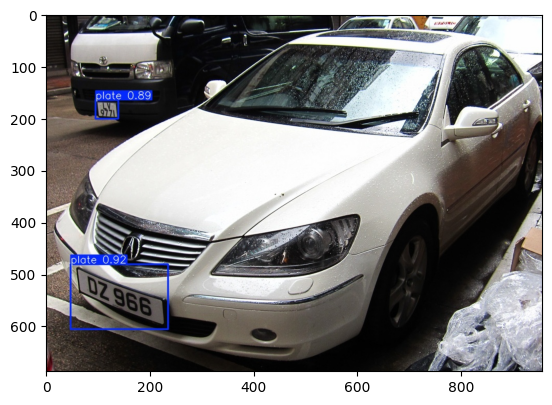

In [12]:
res = cv2.imread('/kaggle/working/runs/detect/predict/image0.jpg')
plt.imshow(res[:, :, ::-1])
plt.show()


0: 800x1280 1 plate, 59.6ms
Speed: 6.8ms preprocess, 59.6ms inference, 1.6ms postprocess per image at shape (1, 3, 800, 1280)
Results saved to /kaggle/working/runs/detect/predict


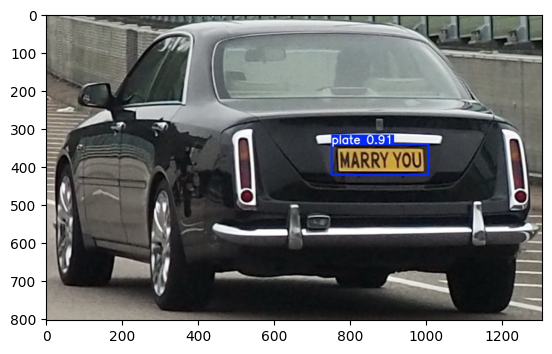

In [13]:
im = cv2.imread('/kaggle/input/car-plate/data_jpg/images/test/000112_0.jpg')
results = model.predict(source=im, save=True)
res = cv2.imread('/kaggle/working/runs/detect/predict/image0.jpg')
plt.imshow(res[:, :, ::-1])
plt.show()

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ—Ä–∞–∂–∞—é—Ç! –ú–æ–¥–µ–ª—å –æ—Ç–ª–∏—á–Ω–æ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç –ø–æ–ª–æ–∂–µ–Ω–∏–µ –∞–≤—Ç–æ–º–æ–±–∏–ª—å–Ω—ã—Ö –Ω–æ–º–µ—Ä–æ–≤: score –≤—ã—Å–æ–∫–∏–π, –¥–∞–∂–µ –∫–æ–≥–¥–∞ –Ω–æ–º–µ—Ä –Ω–∞ –≤—Ç–æ—Ä–æ–º –ø–ª–∞–Ω–µ. –ö—Ä—É—Ç–æ!

In [14]:
data_path = '/kaggle/input/car-plate/data_jpg'
test_image_paths = list(Path(data_path).rglob('images/test/*.jpg'))

In [16]:
path_result = 'test_pred_bboxes.txt'
with open(path_result, 'w') as f:
    f.write('image_name,x_1,y_1,x_2,y_2,conf\n')
    for img_path in test_image_paths:
        results = model.predict(source=str(img_path), save=False, verbose=False, conf=0.1)
        for res in results:
            # –ï—Å–ª–∏ –Ω–µ—Ç –¥–µ—Ç–µ–∫—Ü–∏–π ‚Äî –ø—Ä–æ–ø—É—Å–∫–∞–µ–º
            if res.boxes is None or len(res.boxes) == 0:
                continue
            xyxy = res.boxes.xyxy.cpu().numpy()      # [[x1,y1,x2,y2], ...]
            conf = res.boxes.conf.cpu().numpy() 
            image_name = f"test/{img_path.name}"
            for (x1, y1, x2, y2), c in zip(xyxy, conf):
                line = [image_name, int(round(x1)), int(round(y1)), int(round(x2)), int(round(y2)), float(round(c, 3))]
                f.write(','.join(map(str, line)) +'\n')

print('–§–∞–π–ª —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏ –¥–µ—Ç–µ–∫—Ü–∏–π –∑–∞–ø–∏—Å–∞–Ω!')

–§–∞–π–ª —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏ –¥–µ—Ç–µ–∫—Ü–∏–π –∑–∞–ø–∏—Å–∞–Ω!


–¢–µ–ø–µ—Ä—å –Ω–∞–º –æ—Å—Ç–∞–ª—Å—è —Ç–æ–ª—å–∫–æ OCR.

# –ß–∞—Å—Ç—å –≤—Ç–æ—Ä–∞—è. –†–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏–µ –∞–≤—Ç–æ–º–æ–±–∏–ª—å–Ω—ã—Ö –Ω–æ–º–µ—Ä–æ–≤

In [5]:
import os
import cv2
import torch
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import paddleocr

In [110]:
ocr = paddleocr.PaddleOCR(
        use_angle_cls=True, 
        lang='ch',
        use_gpu=False,
        show_log=False
    )

–ï—â—ë —Ä–∞–∑ –≤–∑–≥–ª—è–Ω–µ–º –Ω–∞ —Ä–∞–∑–º–µ—á–µ–Ω–Ω—ã–µ –Ω–æ–º–µ—Ä–∞.

In [164]:
data_path ='/kaggle/input/car-plate/data_jpg'
cols=['image_name', 'x_1', 'y_1', 'x_2', 'y_2', 'plate']
annot_path = os.path.join(data_path, 'annotation/train_final_annot.txt')
df = pd.read_csv(annot_path, sep=",", names=cols, skiprows=1, header=None)
df.head()

image_name   x_1  y_1   x_2  y_2    plate
0  train/000000_0.jpg   566  558   626  586  Á≤§ZJA50Ê∏Ø
1  train/000000_0.jpg   635  538   705  570    UB175
2  train/000001_0.jpg  1003  791  1160  831   MB3185
3  train/000002_0.jpg  1077  565  1209  604   NG8134
4  train/000004_0.jpg   972  627  1120  668    TT583

In [169]:
df['image_path'] = '/kaggle/input/car-plate/data_jpg/images/'+ df['image_name']
df.head()

image_name   x_1  y_1   x_2  y_2    plate  \
0  train/000000_0.jpg   566  558   626  586  Á≤§ZJA50Ê∏Ø   
1  train/000000_0.jpg   635  538   705  570    UB175   
2  train/000001_0.jpg  1003  791  1160  831   MB3185   
3  train/000002_0.jpg  1077  565  1209  604   NG8134   
4  train/000004_0.jpg   972  627  1120  668    TT583   

                                          image_path  
0  /kaggle/input/car-plate/data_jpg/images/train/...  
1  /kaggle/input/car-plate/data_jpg/images/train/...  
2  /kaggle/input/car-plate/data_jpg/images/train/...  
3  /kaggle/input/car-plate/data_jpg/images/train/...  
4  /kaggle/input/car-plate/data_jpg/images/train/...

–í–æ–∑—å–º–µ–º –∫–∞–∫–æ–π-–Ω–∏–±—É–¥—å –ø—Ä–∏–º–µ—Ä –∏ –æ–±—Ä–µ–∂–µ–º –µ–≥–æ –ø–æ bbox, –ø–æ—Å–º–æ—Ç—Ä–∏–º –∫–∞–∫ —Ä–∞–±–æ—Ç–∞–µ—Ç PaddleOCR.

In [286]:
i=0
some_img = cv2.imread(df.iloc[i]['image_path'])
x1, y1, x2, y2 = df.iloc[i]['x_1':'y_2'].to_numpy()
crop_img = some_img[int(y1):int(y2), int(x1):int(x2)]

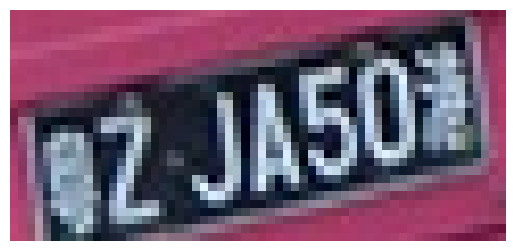

In [287]:
plt.imshow(crop_img[:, :, ::-1])
plt.axis("off")
plt.show()

In [288]:
results_train = ocr(crop_img, cls = True)

In [289]:
print("–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–π –Ω–æ–º–µ—Ä: ", results_train[1][0][0])
print("–ü—Ä–∞–≤–∏–ª—å–Ω—ã–π –Ω–æ–º–µ—Ä: ", df.iloc[i]['plate'])

–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–π –Ω–æ–º–µ—Ä:  Á≤§ZJA50
–ü—Ä–∞–≤–∏–ª—å–Ω—ã–π –Ω–æ–º–µ—Ä:  Á≤§ZJA50Ê∏Ø


–í —Ü–µ–ª–æ–º, –ø–æ–ª—É—á–∏–ª–æ—Å—å –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –Ω–µ–ø–ª–æ—Ö–æ. –ü–æ—Å–ª–µ–¥–Ω–∏–π –∏–µ—Ä–æ–≥–ª–∏—Ñ –æ–Ω —Ç–∞–∫ —Å–µ–±–µ –æ–ø—Ä–µ–¥–µ–ª–∏–ª, –Ω–æ –æ—Å—Ç–∞–ª—å–Ω—ã–µ —Ç–æ—á—å-–≤-—Ç–æ—á—å. –ú–æ–∂–Ω–æ –±—Ä–∞—Ç—å.

–í–æ–∑—å–º–µ–º —Ç–µ—Å—Ç–æ–≤—ã–π –Ω–∞–±–æ—Ä —Å –¥–µ—Ç–µ–∫—Ü–∏—è–º–∏, –∫–æ—Ç–æ—Ä—ã–µ –º—ã –ø–æ–ª—É—á–∏–ª–∏ –æ—Ç YOLO.

In [54]:
cols=['image_name', 'x_1', 'y_1', 'x_2', 'y_2', 'conf']
df_test = pd.read_csv('/kaggle/input/test-detect-result/test_pred_bboxes.txt', sep=",", names=cols, skiprows=1, header=None)
df_test.head()

image_name  x_1  y_1   x_2  y_2   conf
0  test/004297_0.jpg  238  490   551  577  0.916
1  test/004297_0.jpg  265    0   412   37  0.836
2  test/002337_0.jpg  794  333  1081  408  0.901
3  test/002337_0.jpg    0  268    75  346  0.721
4  test/004050_1.jpg    0  252    63  301  0.936

In [55]:
df_test['image_path'] = '/kaggle/input/car-plate/data_jpg/images/'+ df_test['image_name']
df_test.head()

image_name  x_1  y_1   x_2  y_2   conf  \
0  test/004297_0.jpg  238  490   551  577  0.916   
1  test/004297_0.jpg  265    0   412   37  0.836   
2  test/002337_0.jpg  794  333  1081  408  0.901   
3  test/002337_0.jpg    0  268    75  346  0.721   
4  test/004050_1.jpg    0  252    63  301  0.936   

                                          image_path  
0  /kaggle/input/car-plate/data_jpg/images/test/0...  
1  /kaggle/input/car-plate/data_jpg/images/test/0...  
2  /kaggle/input/car-plate/data_jpg/images/test/0...  
3  /kaggle/input/car-plate/data_jpg/images/test/0...  
4  /kaggle/input/car-plate/data_jpg/images/test/0...

In [290]:
i=10
some_img = cv2.imread(df_test.iloc[i]['image_path'])
x1, y1, x2, y2 = df_test.iloc[i]['x_1':'y_2'].to_numpy()
crop_img = some_img[int(y1):int(y2), int(x1):int(x2)]

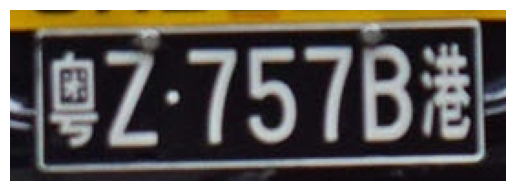

In [291]:
plt.imshow(crop_img[:, :, ::-1])
plt.axis("off")
plt.show()

In [292]:
results = ocr(crop_img, cls = True)

In [293]:
print(results[1][0][0])

Á≤§Z¬∑757BÊ∏Ø


–ù–∞ –ø—Ä–∏–º–µ—Ä–µ –≤—ã—à–µ –≤–∏–¥–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç PaddleOCR –Ω–∞ –æ–¥–Ω–æ–º —Ç–µ—Å—Ç–æ–≤–æ–º –ø—Ä–∏–º–µ—Ä–µ. –ü–æ–ª—É—á–∏–ª–æ—Å—å –∫—Ä—É—Ç–æ! –ù–æ –º–æ–¥–µ–ª—å –ø–µ—Ä–∏–æ–¥–∏—á–µ—Å–∫–∏ –≤—Å—ë –Ω–æ—Ä–æ–≤–∏—Ç –¥–æ–±–∞–≤–∏—Ç—å —Ç–æ—á–∫—É, –∞ –Ω–∞–º –æ–Ω–∞ –Ω–µ –Ω—É–∂–Ω–∞. 

–ù–∞–ø–∏—à–µ–º —Ñ—É–Ω–∫—Ü–∏—é, –∫–æ—Ç–æ—Ä–∞—è –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ—Ç –≤—Å–µ –Ω–æ–º–µ—Ä–∞ –∏–∑ —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –Ω–∞–±–æ—Ä–∞, –æ—á–∏—â–∞–µ—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç –æ—Ç –ª–∏—à–Ω–∏—Ö —Å–∏–º–≤–æ–ª–æ–≤ –∏ –∑–∞–ø–∏—Å—ã–≤–∞–µ—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç –≤ —Ñ–∞–π–ª.

In [150]:
def paddle_ocr_with_prepare(df, path_result):
    with open(path_result, 'w') as f:
        f.write('image_name,plate\n')
        for index, row in df.iterrows():
            frame = cv2.imread(row['image_path'])
            x1, y1, x2, y2 = row['x_1':'y_2'].to_numpy()
            crop_img = frame[int(y1):int(y2), int(x1):int(x2)]
            results = ocr(crop_img, cls = True)
            if len(results[1]) == 0:
                continue
            #–ù–æ–º–µ—Ä —Å–ª–∏—Ç–Ω—ã–π, –Ω–æ –º–æ–¥–µ–ª—å –∏–Ω–æ–≥–¥–∞ —Ä–∞–∑–¥–µ–ª—è–µ—Ç –µ–≥–æ, —Å–æ–ª—å–µ–º –≤ –æ–¥–∏–Ω
            merge_result = ''.join(char[0] for char in results[1])
            #–¢–µ–ø–µ—Ä—å –ø–æ—á–∏—Å—Ç–∏–º –æ—Ç –Ω–µ–Ω—É–∂–Ω—ã—Ö –Ω–∞–º —Å–∏–º–≤–æ–ª–æ–≤, –æ—Å—Ç–∞–≤–∏–º —Ç–æ–ª—å–∫–æ –±—É–∫–≤—ã (–≤ —Ç–æ–º —á–∏—Å–ª–µ –∏–µ—Ä–æ–≥–ª–∏—Ñ—ã) –∏ —Ü–∏—Ñ—Ä—ã
            clean_result = re.sub(r"[^\w\u4e00-\u9fff]", "", merge_result)
            image_name = row['image_name']
            line = [image_name, clean_result, x1, y1, x2, y2]
            f.write(','.join(map(str, line)) +'\n')
    print('–§–∞–π–ª —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏ —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏—è –Ω–æ–º–µ—Ä–æ–≤ –∑–∞–ø–∏—Å–∞–Ω!')

In [151]:
path_result = 'test_pred_plates_new.txt'
paddle_ocr_with_prepare(df_test, path_result)

–§–∞–π–ª —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏ —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏—è –Ω–æ–º–µ—Ä–æ–≤ –∑–∞–ø–∏—Å–∞–Ω!


–û—Ç—Ä–∏—Å—É–µ–º –ø–æ–ª—É—á–µ–Ω–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç.

In [152]:
cols=['image_name', 'plate', 'x_1', 'y_1', 'x_2', 'y_2']
df_ocr = pd.read_csv('/kaggle/working/test_pred_plates_new.txt', sep=",", names=cols, skiprows=1, header=None)
df_ocr.head()

image_name    plate  x_1  y_1   x_2  y_2
0  test/004297_0.jpg    NC488  238  490   551  577
1  test/002337_0.jpg   UG8191  794  333  1081  408
2  test/002337_0.jpg       66    0  268    75  346
3      test/3757.jpg  ËãèL0602X  339  368   545  448
4      test/3757.jpg    ÁöñBFM6    7  329   128  393

In [153]:
df_ocr['image_path'] = '/kaggle/input/car-plate/data_jpg/images/' + df_ocr['image_name']
df_ocr.head()

image_name    plate  x_1  y_1   x_2  y_2  \
0  test/004297_0.jpg    NC488  238  490   551  577   
1  test/002337_0.jpg   UG8191  794  333  1081  408   
2  test/002337_0.jpg       66    0  268    75  346   
3      test/3757.jpg  ËãèL0602X  339  368   545  448   
4      test/3757.jpg    ÁöñBFM6    7  329   128  393   

                                          image_path  
0  /kaggle/input/car-plate/data_jpg/images/test/0...  
1  /kaggle/input/car-plate/data_jpg/images/test/0...  
2  /kaggle/input/car-plate/data_jpg/images/test/0...  
3  /kaggle/input/car-plate/data_jpg/images/test/3...  
4  /kaggle/input/car-plate/data_jpg/images/test/3...

plt.title –Ω–µ –ø–æ–¥–¥–µ—Ä–∂–∏–≤–∞–µ—Ç –Ω–∞–ø–∏—Å–∞–Ω–∏–µ –∏–µ—Ä–æ–≥–ª–∏—Ñ–æ–≤, –≤–º–µ—Å—Ç–æ –Ω–∏—Ö –æ–Ω —Å—Ç–∞–≤–∏—Ç –∑–∞–≥–∞–¥–æ—á–Ω—ã–µ –∫–≤–∞–¥—Ä–∞—Ç–∏–∫–∏. –î–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –æ–Ω –Ω–æ—Ä–º–∞–ª—å–Ω–æ –æ—Ç–æ–±—Ä–∞–∂–∞–ª –∏–µ—Ä–æ–≥–ª–∏—Ñ—ã, –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —Å–∫–∞—á–∞—Ç—å —à—Ä–∏—Ñ—Ç –¥–ª—è –∏–µ—Ä–æ–≥–ª–∏—Ñ–æ–≤.

In [158]:
!apt-get install -y fonts-noto-cjk

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  fonts-noto-cjk-extra
The following NEW packages will be installed:
  fonts-noto-cjk
0 upgraded, 1 newly installed, 0 to remove and 132 not upgraded.
Need to get 61.2 MB of archives.
After this operation, 93.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk all 1:20220127+repack1-1 [61.2 MB]
Fetched 61.2 MB in 1s (60.3 MB/s)         
Selecting previously unselected package fonts-noto-cjk.
(Reading database ... 128639 files and directories currently installed.)
Preparing to unpack .../fonts-noto-cjk_1%3a20220127+repack1-1_all.deb ...
Unpacking fonts-noto-cjk (1:20220127+repack1-1) ...
Setting up fonts-noto-cjk (1:20220127+repack1-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


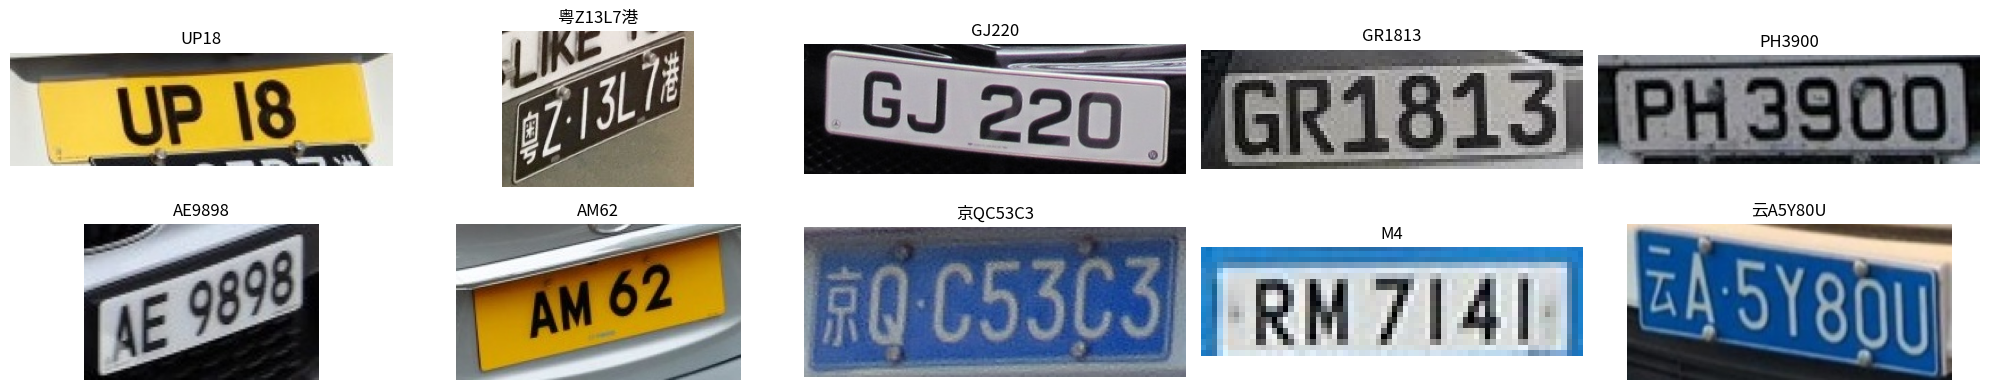

In [159]:
SAMPLE_SIZE = 10
NUM_COLS = 5
NUM_ROWS = SAMPLE_SIZE // NUM_COLS + int(SAMPLE_SIZE % NUM_COLS != 0)

random_idxs = np.random.choice(len(df_ocr), size=SAMPLE_SIZE, replace=False)
plt.figure(figsize=(20, 2 * NUM_ROWS))
font_path = '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Noto Sans CJK JP'  
for i, idx in enumerate(random_idxs, 1):
    item = df_ocr.loc[idx]
    text = item['plate']
    image = cv2.imread(item['image_path'])
    x1, y1, x2, y2 = item['x_1':'y_2'].to_numpy()
    crop_img = image[y1:y2, x1:x2]
    plt.subplot(NUM_ROWS, NUM_COLS, i)
    plt.imshow(crop_img[:, :, ::-1])
    plt.title(text)
    plt.axis('off')
    

plt.tight_layout()
plt.show()

–£—Ä–∞, —Å—Ä–∞–±–æ—Ç–∞–ª–æ! –í –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–µ —Å–ª—É—á–∞–µ–≤ —Ç–µ–∫—Å—Ç —Ä–∞—Å–ø–æ–∑–Ω–∞–Ω –æ—Ç–ª–∏—á–Ω–æ. –ó–∞–¥–∞—á–∞ —Ä–µ—à–µ–Ω–∞.